# Importing Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Setting up the dataset

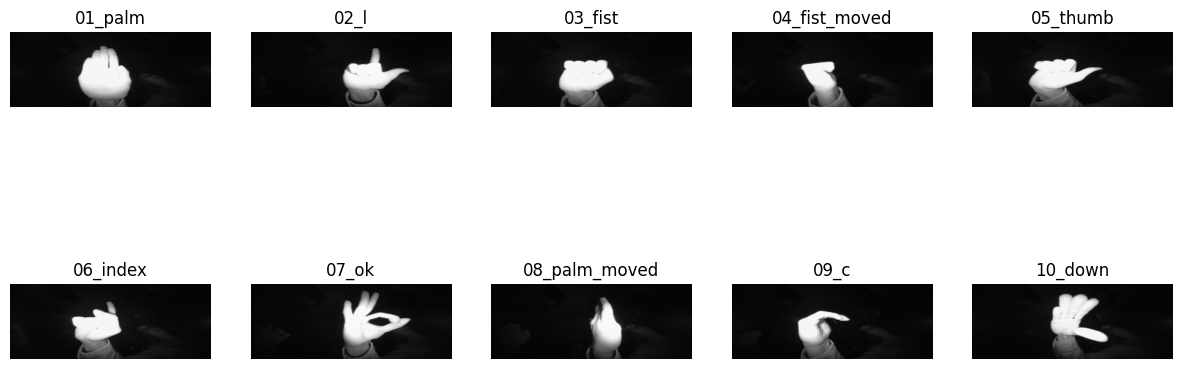

In [64]:
# Set the path to the dataset
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
data_dir = './HandGesture/leapGestRecog'
# Initialize empty lists to store image data and labels
images = []
labels = []

# Loop through each category folder
for category in CATEGORIES:
    category_path = os.path.join(data_dir, category)
    
    # List of image paths in the category folder
    image_paths = [os.path.join(category_path, img) for img in os.listdir(category_path)]
    
    # Sample 1 image from each category
    sampled_images = random.sample(image_paths, 1)
    
    # Loop through each sampled image in the category folder
    for img_path in sampled_images:
        # Read the image using OpenCV
        image = cv2.imread(img_path)
        
        # Append the image to the list of images
        images.append(image)
        
        # Append the label (category index) to the list of labels
        labels.append(CATEGORIES.index(category))

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Display the sampled images with their corresponding labels
display_images_with_labels(images, labels, CATEGORIES)

In [29]:
# Get the list of gesture classes
gesture_classes = os.listdir(data_dir)

In [42]:
# Initialize empty lists to store image data and labels
images = []
labels = []
for gesture_class in gesture_classes:
    class_dir = os.path.join(data_dir, gesture_class)
    for subdir in os.listdir(class_dir):
        subdir_path = os.path.join(class_dir, subdir)
        if os.path.isdir(subdir_path):  # Check if it's a directory
            for img in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, img)
                # Read the image
                image = cv2.imread(img_path)
                
                # Check if the image is not empty
                if image is not None:
                    # Resize the image to a fixed size
                    image = cv2.resize(image, (100, 100))
                    images.append(image)
                    labels.append(gesture_class)
                else:
                    print(f"Unable to read image: {img_path}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [35]:
# Encoding labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalizing the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

## Data Augmentation

In [12]:
# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

train_datagen.fit(X_train)

## Building the model

In [14]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(gesture_classes), activation='softmax')
])

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the model

In [17]:
# Train the model
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/20


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 62s 120ms/step - accuracy: 0.1780 - loss: 2.1772 - val_accuracy: 0.6702 - val_loss: 0.9241
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 66s 131ms/step - accuracy: 0.6356 - loss: 1.0126 - val_accuracy: 0.8478 - val_loss: 0.3781
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 73s 145ms/step - accuracy: 0.8097 - loss: 0.5098 - val_accuracy: 0.9435 - val_loss: 0.2035
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 71s 141ms/step - accuracy: 0.8786 - loss: 0.3383 - val_accuracy: 0.9488 - val_loss: 0.1268
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.9113 - loss: 0.2479 - val_accuracy: 0.9423 - val_loss: 0.1485
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.9246 - loss: 0.2090 - val_accuracy: 0.9700 - val_loss: 0.0841
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.9473 - loss: 0.1548 - val_accuracy: 0.9883 - val_loss: 0.0288
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 152ms/step - accuracy: 0.9481 - loss: 0.1450 - val

## Evaluating the model

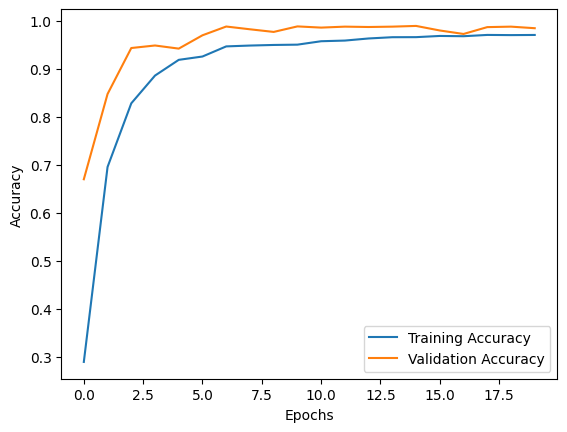

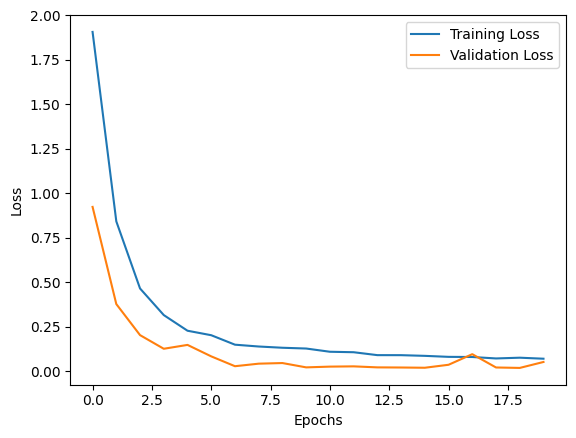

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 1.8495e-05
Test accuracy: 100.00%
